**Build a CNN Based Classifier for Classifying the Common objects using CIFAR10 Datasets.**

**Requirements:**

*   Five Number of Convolutional 2D Layers starting with 1024 filters.
*   Kernel size 3 x 3
*   Two Average Pooling Layers, Each after two Convolutional 2D layers.
*   Stride 2
*   Padding ‘valid’
*   Optimizer Adam
*   Loss function catagorical_crossentropy


In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# Load CIFAR-10 dataset (normalized for better training)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [32]:
# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [33]:
print(x_train.shape[1:])

(32, 32, 3)


In [34]:
# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))

# Second convolutional layer
model.add(Conv2D(512, kernel_size=(3, 3),  activation='relu', padding='valid'))

#First Average Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2)))

# Third convolutional layer
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='valid'))

# Fourth convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='valid'))

#Second Average Pooling
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2)))

# Fifth convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'))

# Flatten the output for feeding into the dense layers
model.add(Flatten())

# Dense layer with 10 units (number of classes) for classification
model.add(Dense(num_classes, activation='softmax'))


In [35]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# Train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.7141 - accuracy: 0.3750 - val_loss: 1.3935 - val_accuracy: 0.4883
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.2816 - accuracy: 0.5371 - val_loss: 1.3590 - val_accuracy: 0.5285
Epoch 3/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.0761 - accuracy: 0.6157 - val_loss: 1.0378 - val_accuracy: 0.6257
Epoch 4/5
1563/1563 [==============================] - 118s 76ms/step - loss: 0.9224 - accuracy: 0.6768 - val_loss: 0.9283 - val_accuracy: 0.6749
Epoch 5/5
1563/1563 [==============================] - 122s 78ms/step - loss: 0.8096 - accuracy: 0.7177 - val_loss: 0.9082 - val_accuracy: 0.6825


In [38]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 23ms/step - loss: 0.9082 - accuracy: 0.6825
Test accuracy: 0.6825000047683716


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [40]:
# Make predictions on the test set
predictions = model.predict(x_test)

313/313 [==============================] - 7s 22ms/step


In [42]:
# Calculate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[738  23 125  15  12   8   7   1  30  41]
 [ 23 832  20   8   4  16  14   0  12  71]
 [ 56   4 695  32  44  88  54  15   6   6]
 [ 18   7 119 414  54 312  51  15   2   8]
 [ 20   4 152  52 572  86  60  44   4   6]
 [  4   5  74  78  41 752  16  27   1   2]
 [  6   4  87  52  27  59 760   1   1   3]
 [ 10   1  83  27  95 159   4 604   1  16]
 [130  51  63  17   7  16   5   1 673  37]
 [ 29 106  12  18   7  21   7   5  10 785]]


In [43]:
# Generate classification report
print('Classification Report:\n', classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      1000
           1       0.80      0.83      0.82      1000
           2       0.49      0.69      0.57      1000
           3       0.58      0.41      0.48      1000
           4       0.66      0.57      0.61      1000
           5       0.50      0.75      0.60      1000
           6       0.78      0.76      0.77      1000
           7       0.85      0.60      0.71      1000
           8       0.91      0.67      0.77      1000
           9       0.81      0.79      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.69     10000
weighted avg       0.71      0.68      0.69     10000



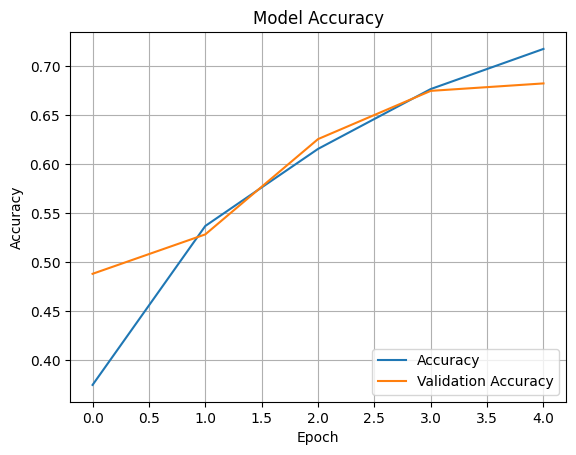

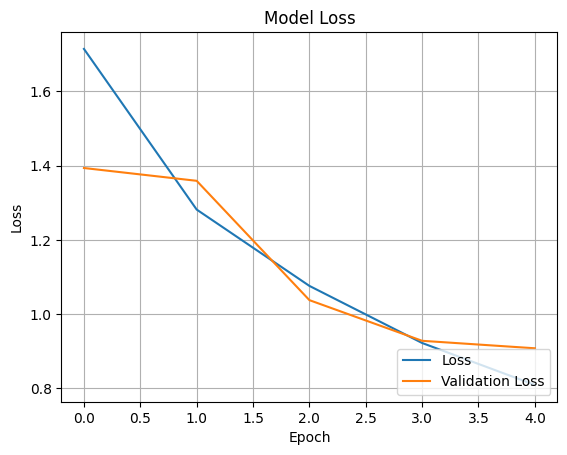

In [44]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()